<a href="https://colab.research.google.com/github/shRiyas02/Cancer-Detection-ML-/blob/main/Shriya_S_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering on Heart Disease Dataset

In [ ]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Models
from scipy.stats import zscore
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

random_state = 2
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

In [ ]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){return false;}

<IPython.core.display.Javascript object>

    ### Import Data

In [ ]:
# importing the heart data
heart = pd.read_csv ('D:\python assignment\heart.csv')
heart.head ()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,44,1,1,126,243,0,1,177,1,0.267937,2
1,2,77,0,2,127,195,1,2,134,1,2.648125,1
2,3,32,0,2,148,231,1,1,166,0,1.780623,3
3,4,54,0,4,130,225,0,2,174,1,0.306361,2
4,5,53,0,3,115,251,1,1,167,1,1.815071,1


In [ ]:
#finding null values

heart.isnull()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# data shows nil missing values.
#However, ensuring null values are eliminated, if any.

heart= heart.dropna()
heart.head ()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,44,1,1,126,243,0,1,177,1,0.267937,2
1,2,77,0,2,127,195,1,2,134,1,2.648125,1
2,3,32,0,2,148,231,1,1,166,0,1.780623,3
3,4,54,0,4,130,225,0,2,174,1,0.306361,2
4,5,53,0,3,115,251,1,1,167,1,1.815071,1


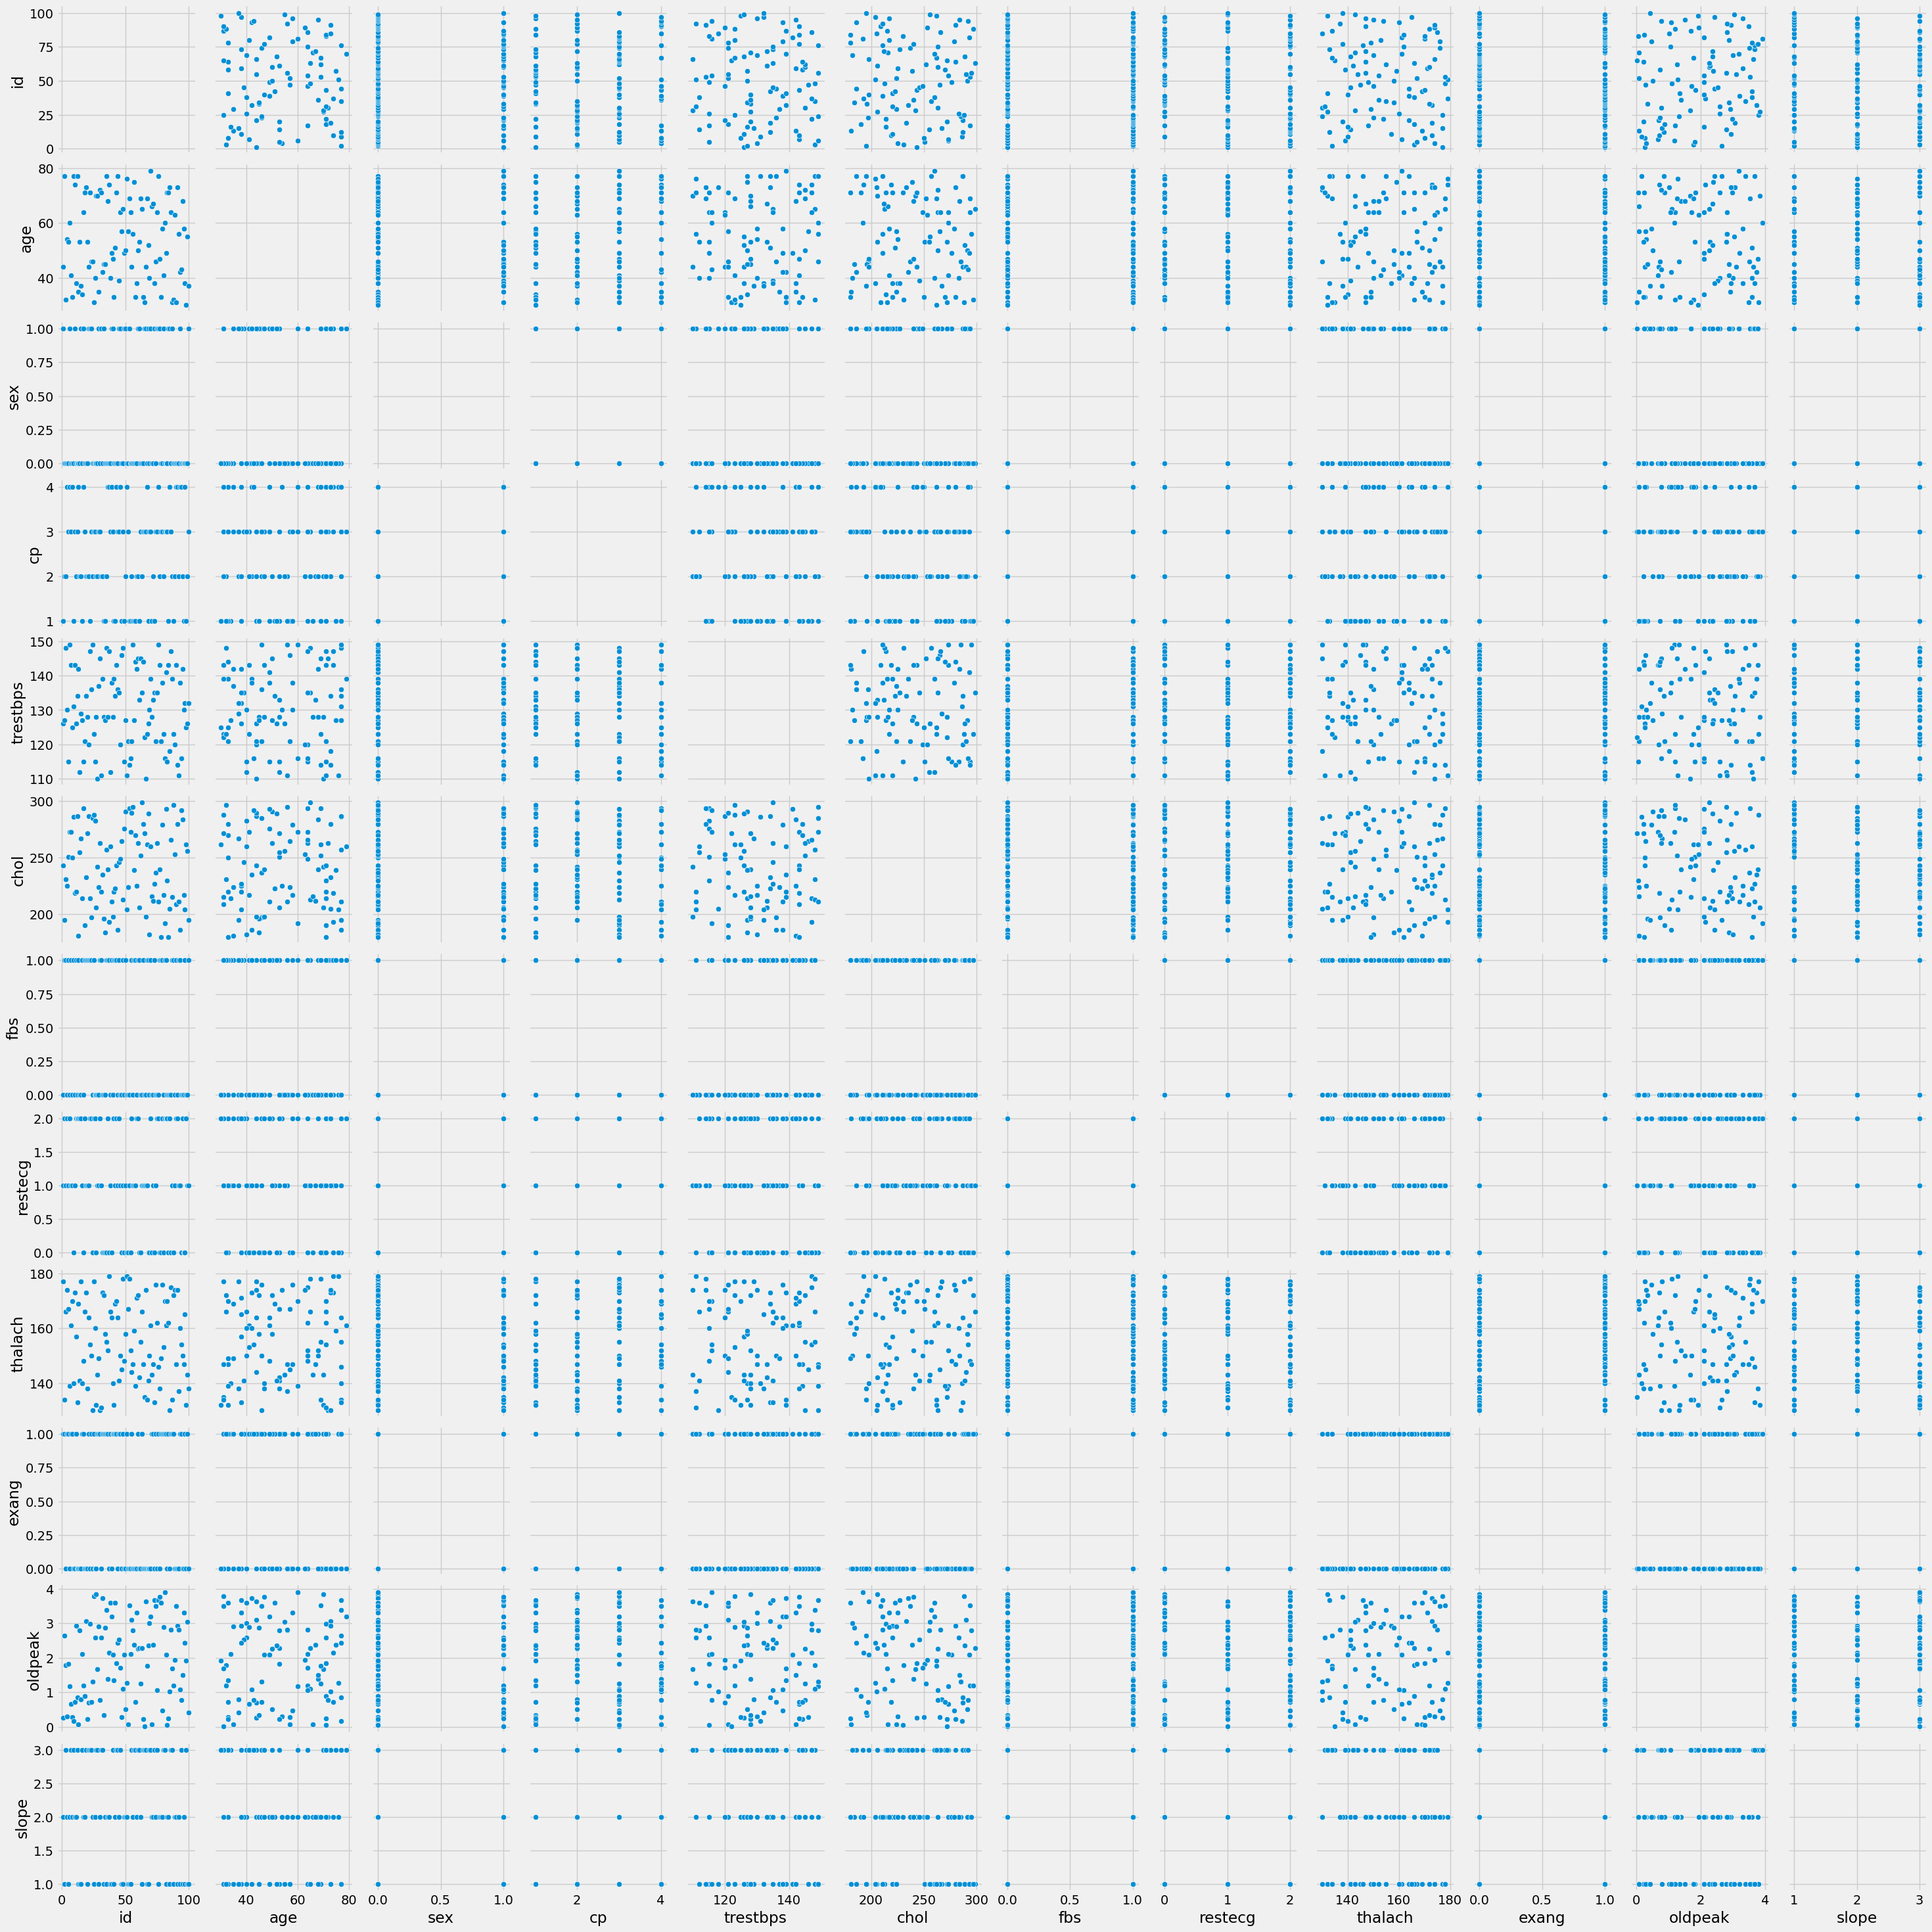

In [ ]:
#plotting the scatter plot to check for clusters

sns.pairplot(heart, diag_kind ='Kde')

In [ ]:
# Lets scale the data to see the difference

heart_scaled = heart.apply (zscore)
heart_scaled.head ()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,-1.714816,-0.663332,1.393261,-1.399454,-0.401687,0.074515,-1.0,-0.050063,1.464743,1.020204,-1.421669,-0.049296
1,-1.680173,1.530051,-0.717741,-0.440924,-0.313982,-1.301153,1.0,1.201503,-1.408613,1.020204,0.601080,-1.281706
2,-1.645531,-1.460926,-0.717741,-0.440924,1.527814,-0.269402,1.0,-0.050063,0.729699,-0.980196,-0.136147,1.183113
3,-1.610888,0.001329,-0.717741,1.476136,-0.050869,-0.441360,-1.0,1.201503,1.264277,1.020204,-1.389015,-0.049296
4,-1.576245,-0.065137,-0.717741,0.517606,-1.366437,0.303794,1.0,-0.050063,0.796521,1.020204,-0.106872,-1.281706


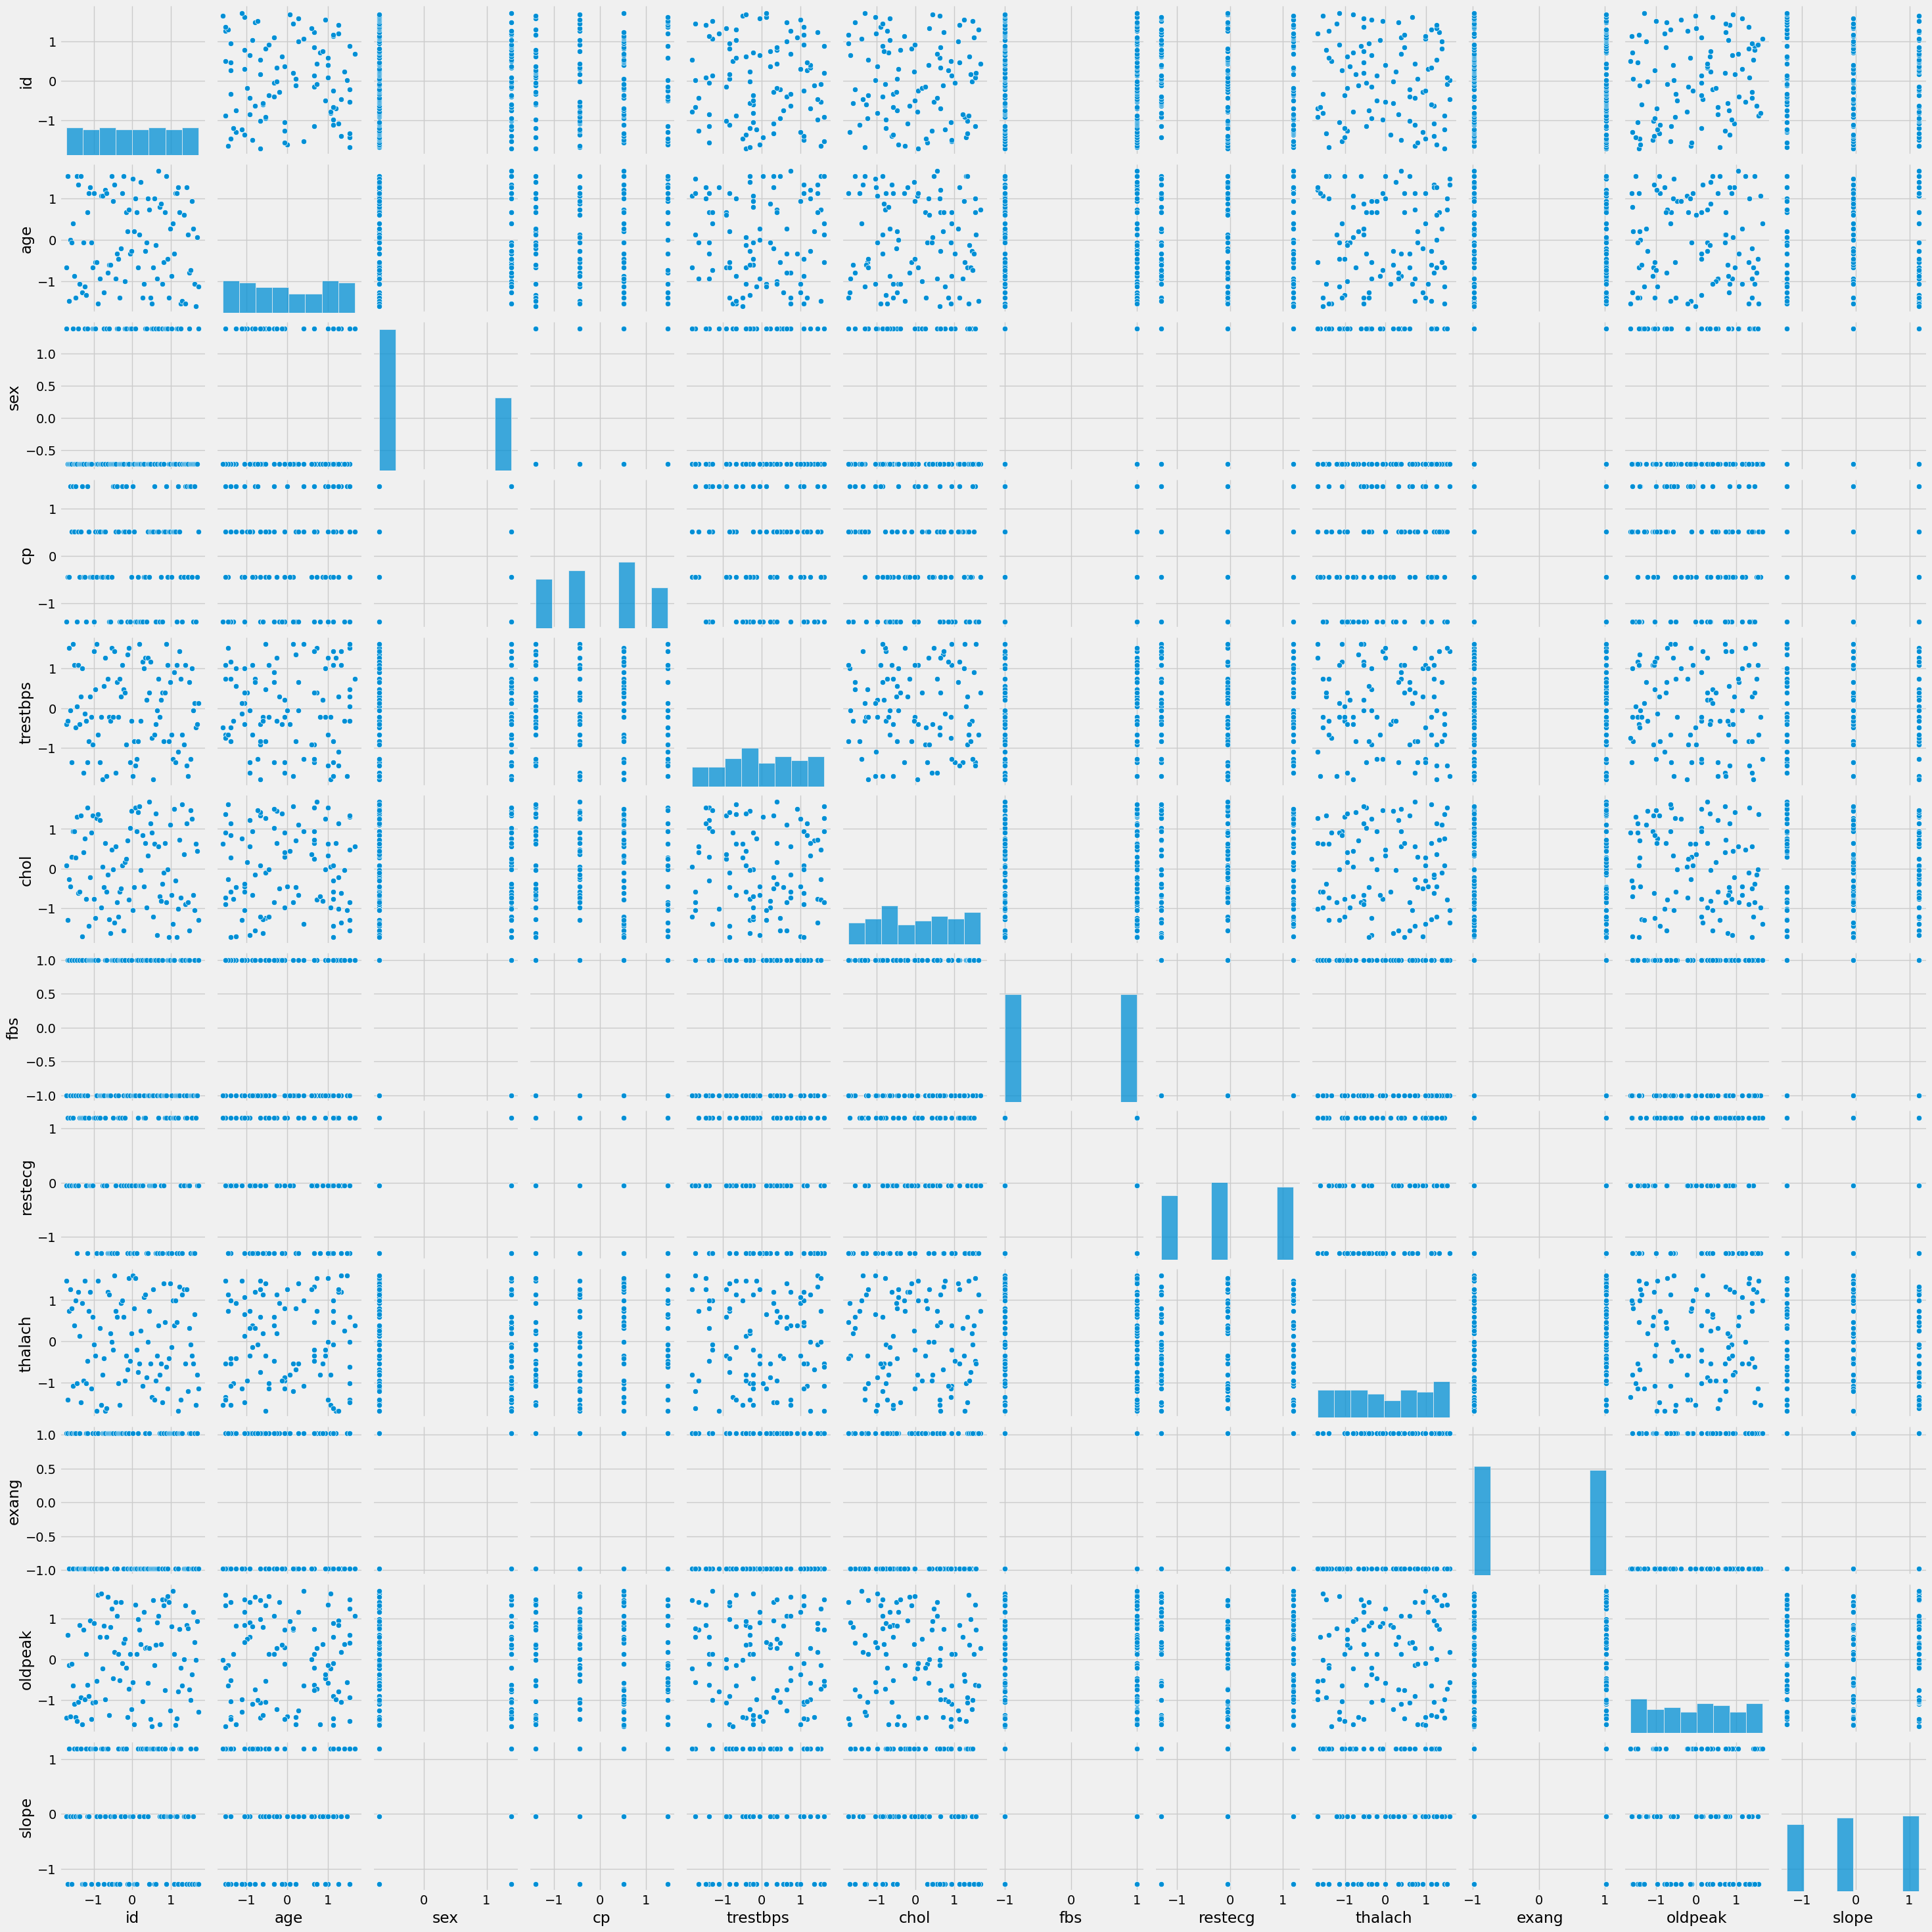

In [ ]:
#visualising scaled data
sns.pairplot (heart_scaled)

## EDA

In [ ]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.500000,29.011492,1.00000,25.750000,50.500000,75.25000,100.00000
age,100.0,53.980000,15.121047,30.00000,40.750000,53.000000,69.00000,79.00000
sex,100.0,0.340000,0.476095,0.00000,0.000000,0.000000,1.00000,1.00000
cp,100.0,2.460000,1.048520,1.00000,2.000000,2.500000,3.00000,4.00000
trestbps,100.0,130.580000,11.459353,110.00000,121.000000,130.000000,141.25000,149.00000
chol,100.0,240.400000,35.067900,180.00000,211.750000,240.000000,272.00000,299.00000
fbs,100.0,0.500000,0.502519,0.00000,0.000000,0.500000,1.00000,1.00000
restecg,100.0,1.040000,0.803025,0.00000,0.000000,1.000000,2.00000,2.00000
thalach,100.0,155.080000,15.040471,130.00000,141.750000,154.500000,169.25000,179.00000
exang,100.0,0.490000,0.502418,0.00000,0.000000,0.000000,1.00000,1.00000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   age       100 non-null    int64  
 2   sex       100 non-null    int64  
 3   cp        100 non-null    int64  
 4   trestbps  100 non-null    int64  
 5   chol      100 non-null    int64  
 6   fbs       100 non-null    int64  
 7   restecg   100 non-null    int64  
 8   thalach   100 non-null    int64  
 9   exang     100 non-null    int64  
 10  oldpeak   100 non-null    float64
 11  slope     100 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 9.5 KB


In [ ]:
# creating copy of dataset
heart_org = heart.copy ()


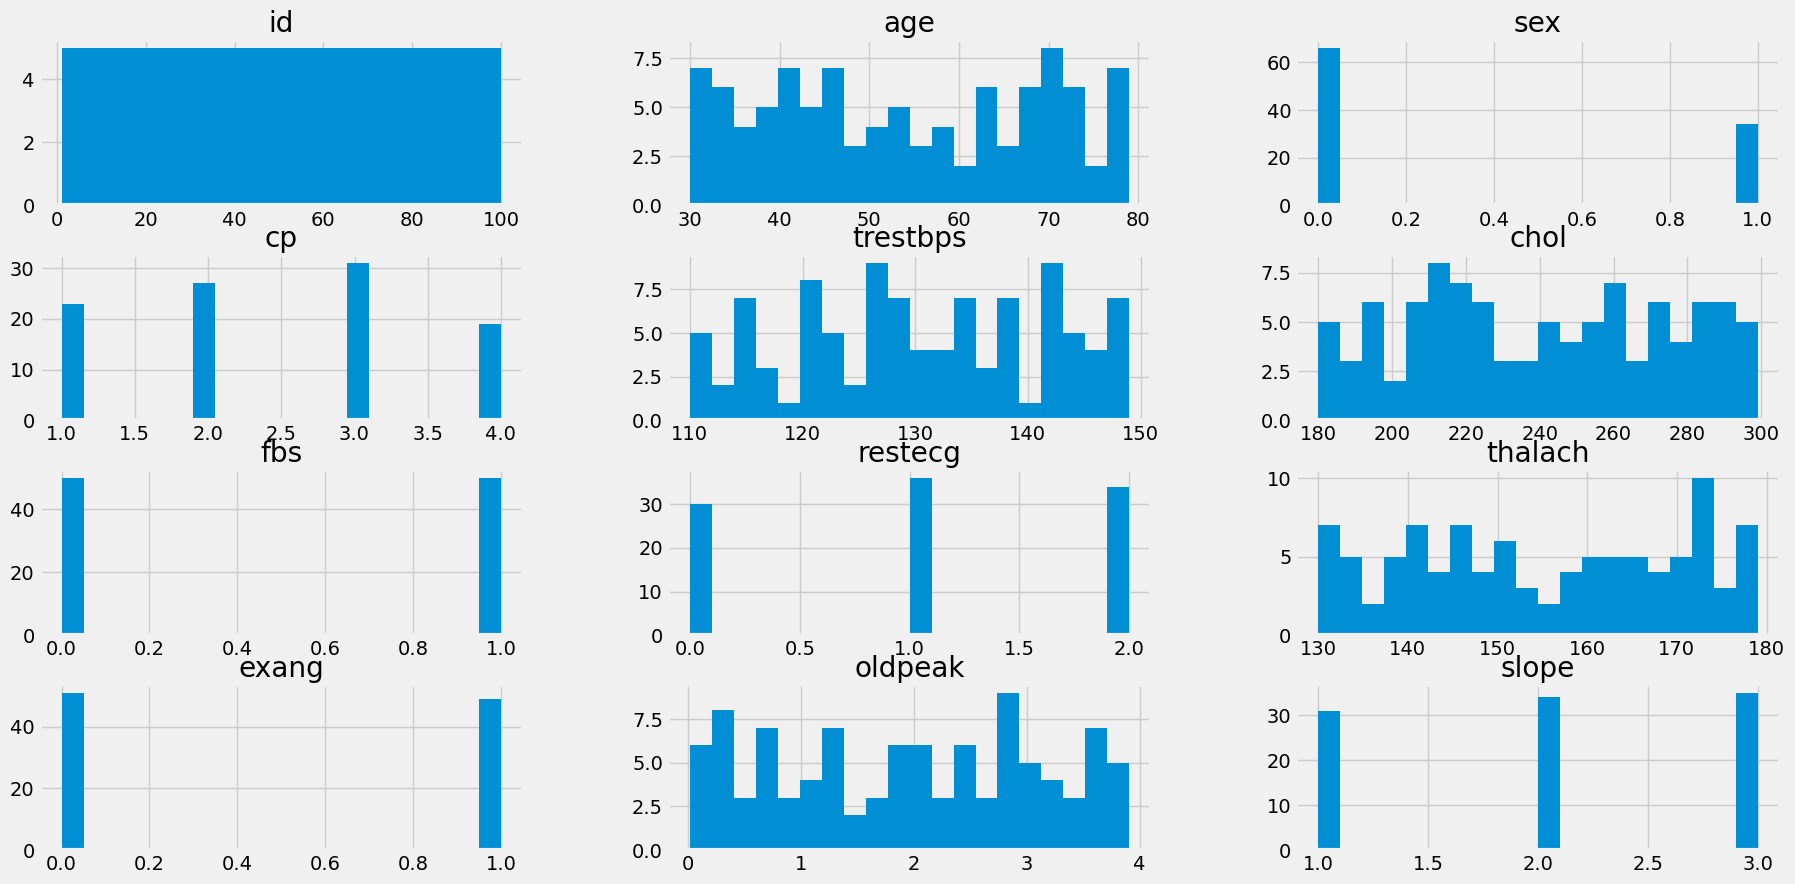

In [ ]:
#
style.use('fivethirtyeight')
columns = heart.columns
heart[columns].hist(stacked=False, bins=20, figsize=(20,10), layout=(4,3));

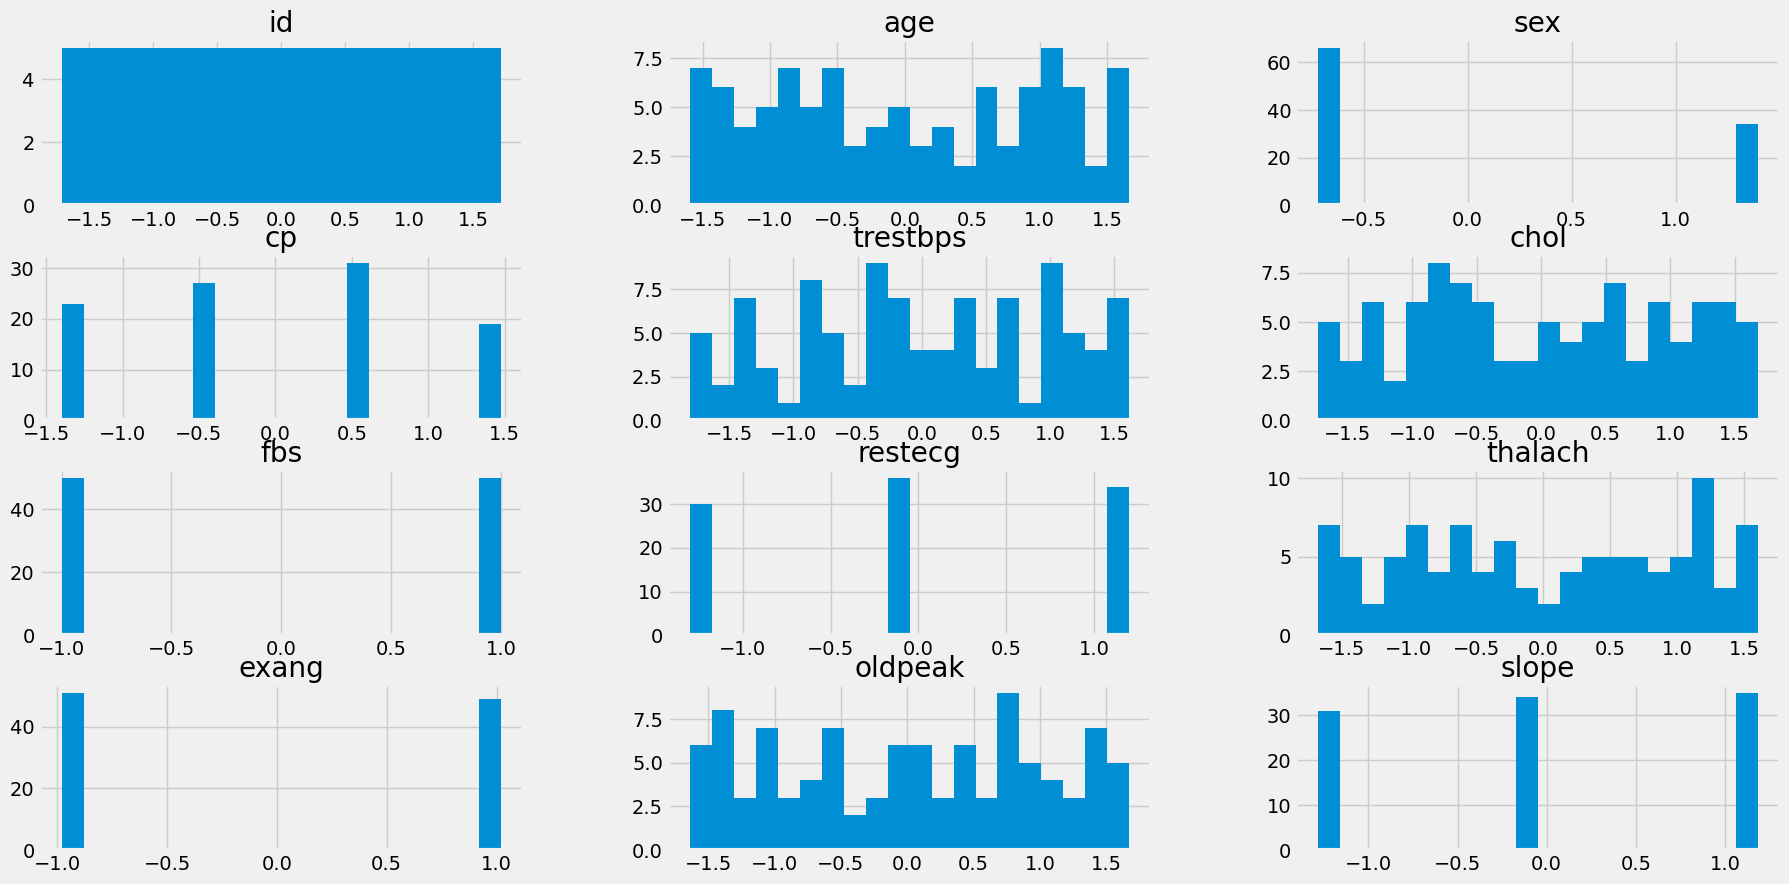

In [ ]:
style.use('fivethirtyeight')
columns = heart_scaled.columns
heart_scaled[columns].hist(stacked=False, bins=20, figsize=(20,10), layout=(4,3));

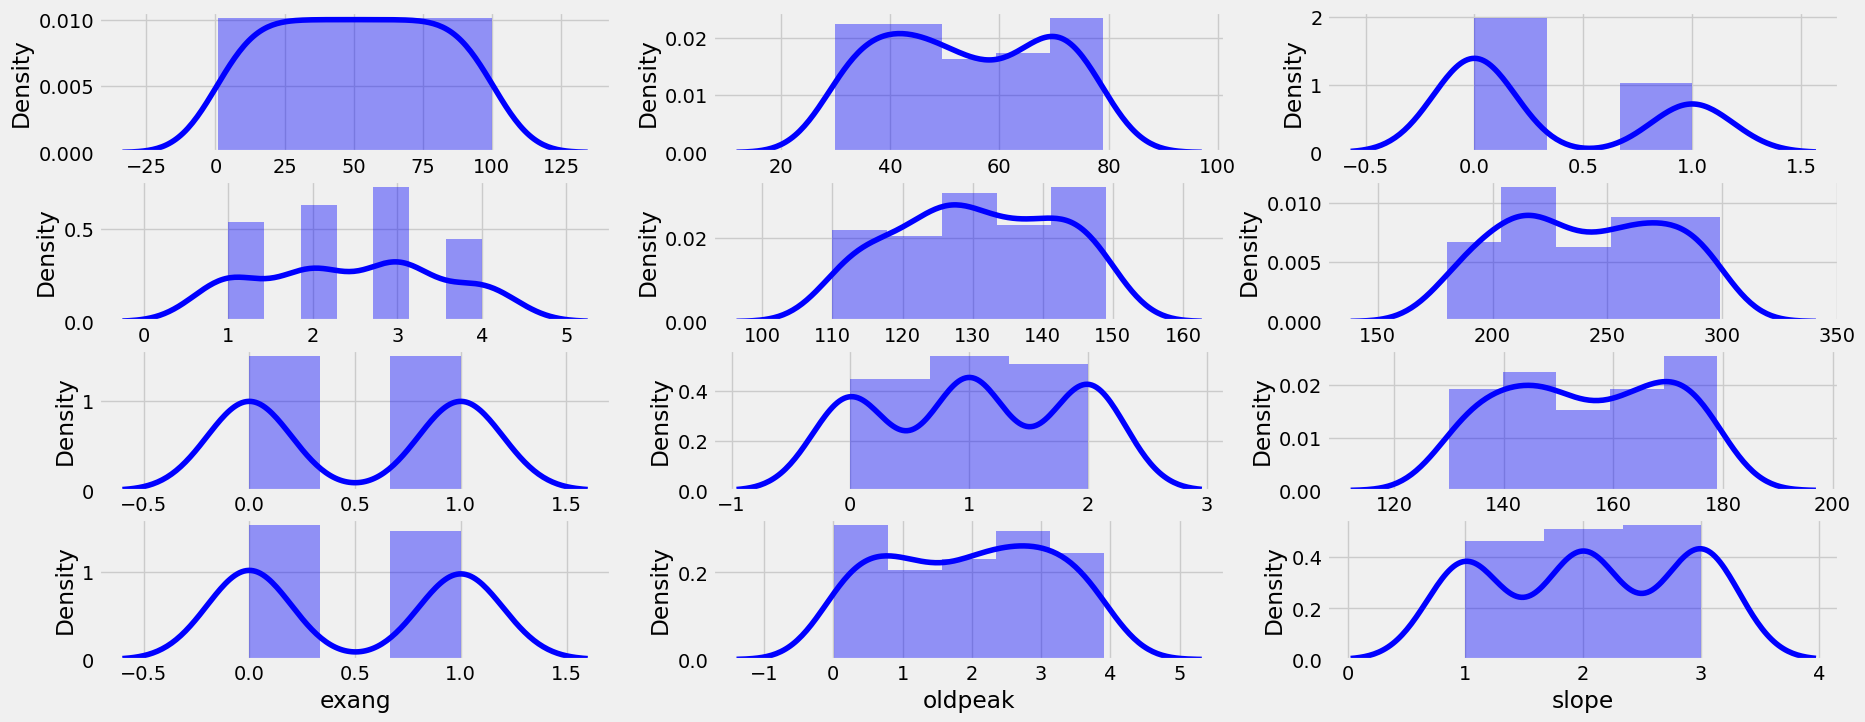

In [ ]:
#Density plots
plt.figure(figsize=(20, 8))
col = 1
for i in heart.columns:
    plt.subplot(4, 3, col)
    sns.distplot(heart[i], color = 'b')
    col += 1

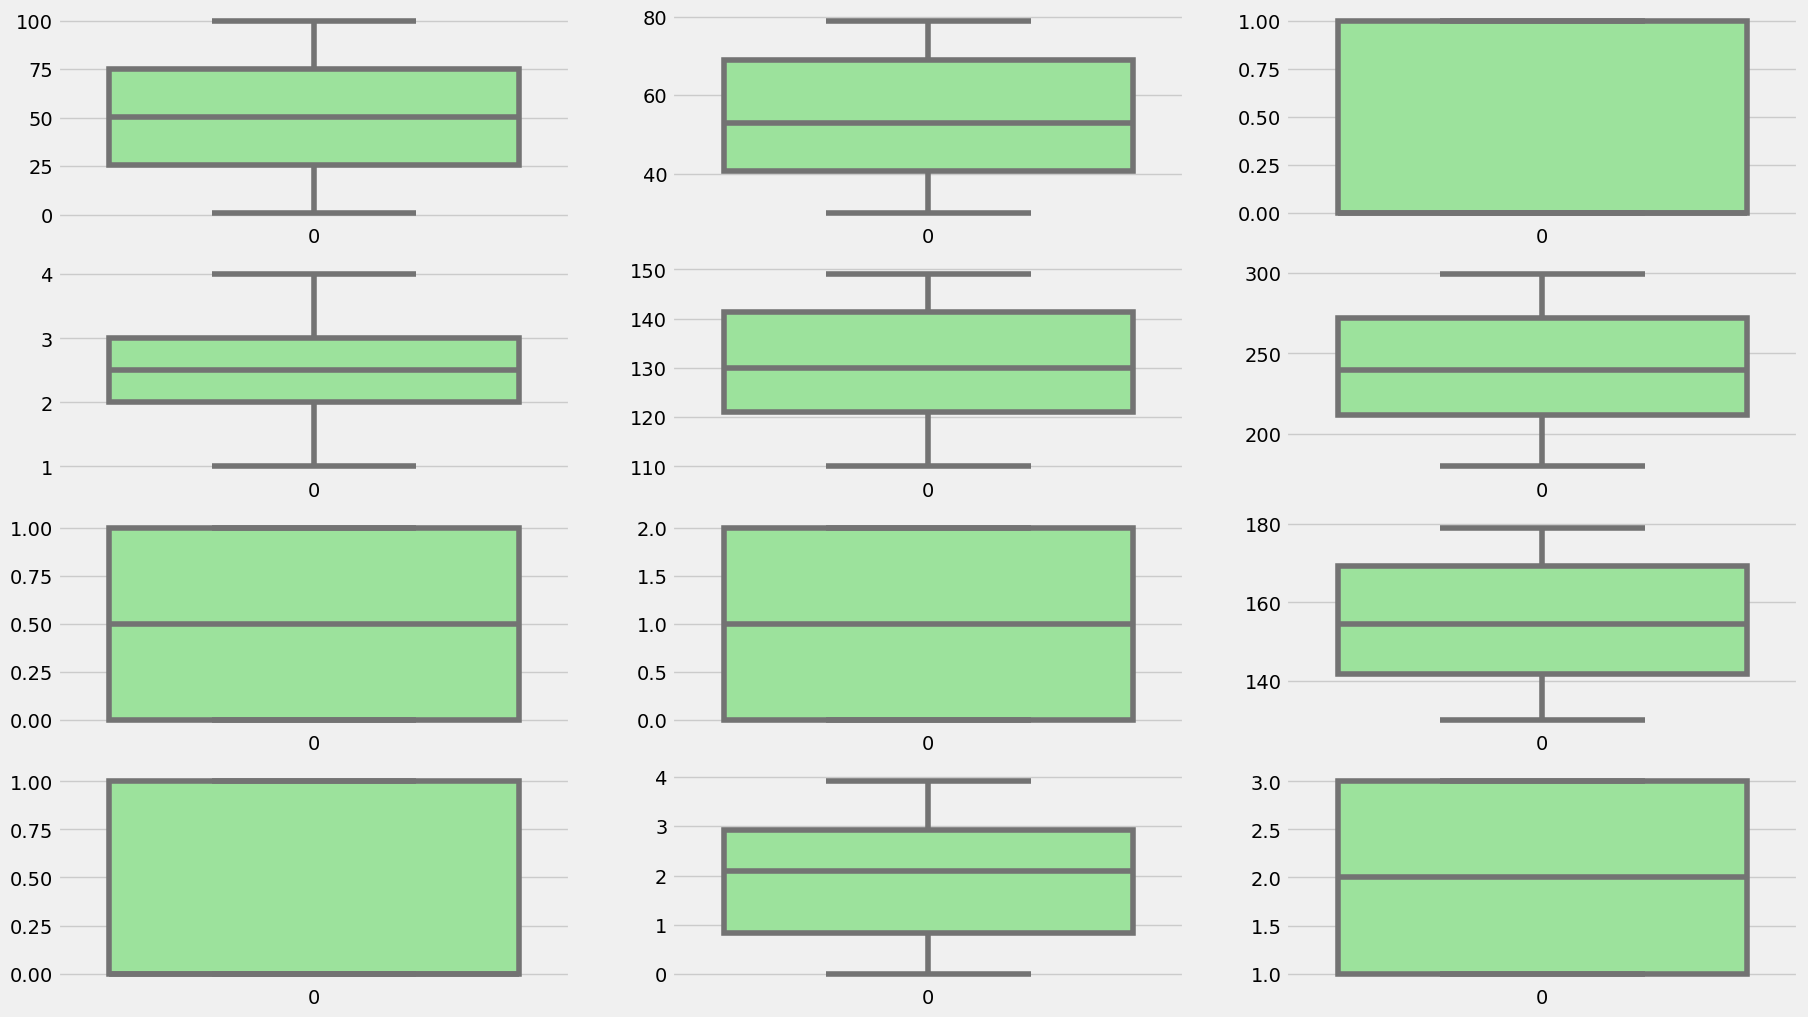

In [ ]:
#boxplots for outliers
plt.figure(figsize=(20,12))
col = 1
for i in heart.columns:
    plt.subplot(4, 3, col)
    sns.boxplot(heart[i],color='lightgreen')
    col += 1

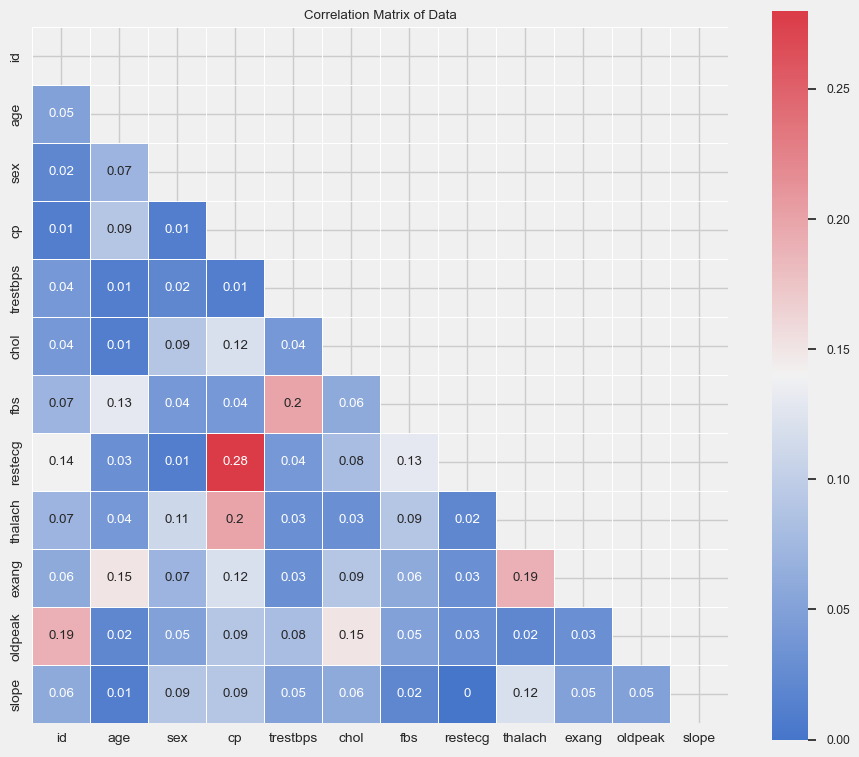

In [ ]:
corr = abs(heart.corr()).round(2)

mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10, 9))

cmap = sns.diverging_palette(255, 10, as_cmap = True)
sns.set(font_scale=.8)
plt.title('Correlation Matrix of Data')
pt = sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, annot = True);

In [ ]:
# no extreme values were observed in boxplot
# also from scatterplot, its diificult to determine number of clusters.
# Hence, we will apply elobow method to find out number of clusters.


## Plotting Elbow curve

In [ ]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


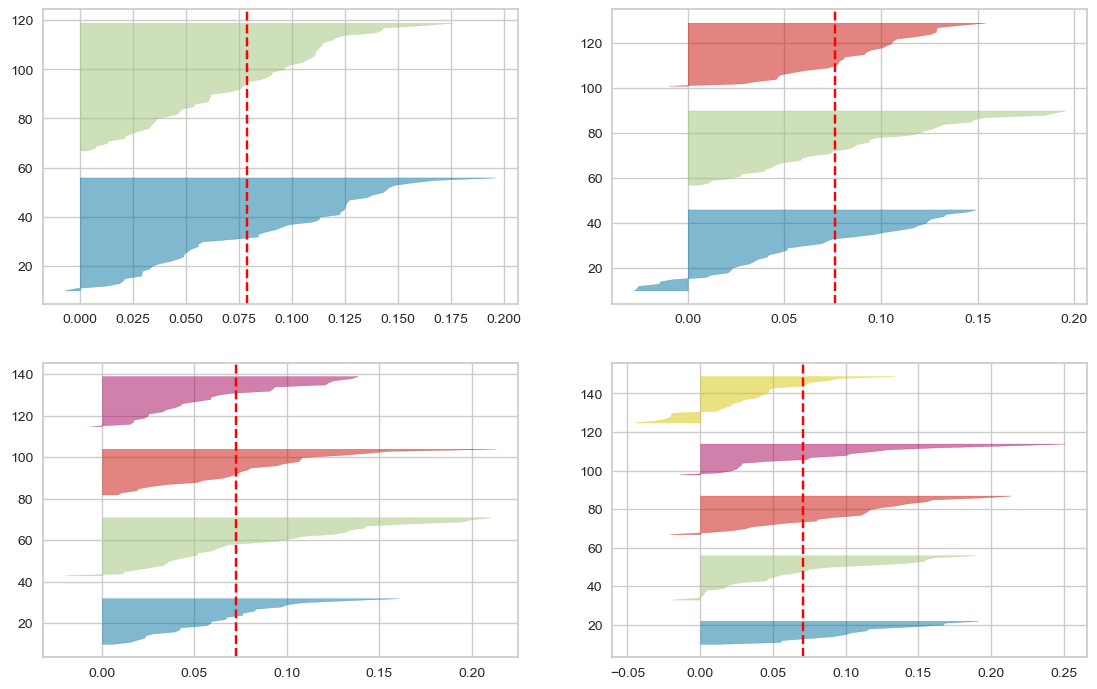

In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer
clusters=range(1,6)
meanDistortions=[]

fig, ax = plt.subplots(2,2, figsize=(12,8))
for k in clusters:
    model = KMeans(n_clusters=k, n_init = 15, init='k-means++', random_state=2)
    model.fit(heart_scaled)
    meanDistortions.append(model.inertia_)
    if(k > 1):
        q, mod = divmod(k, 2)
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(heart_scaled)

## Plotting the elbow curve

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

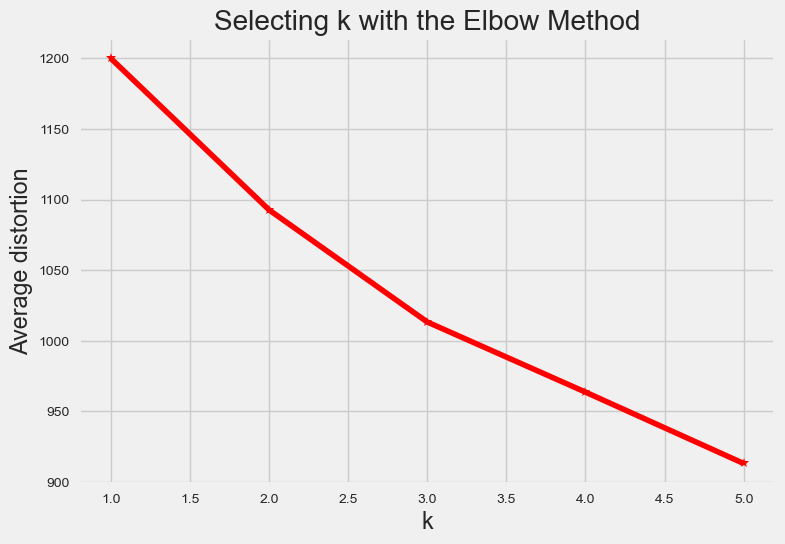

In [ ]:
style.use('fivethirtyeight')
plt.plot(clusters, meanDistortions, 'b*-', color='red')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')